<a href="https://colab.research.google.com/github/edisonc57/Inzhiniring-gazovykh-rezervuarov/blob/main/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0%2001%20-%20%D0%A1%D0%B2%D0%BE%D0%B9%D1%81%D1%82%D0%B2%D0%B0%20%D0%BF%D1%80%D0%B8%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D1%85%20%D0%B3%D0%B0%D0%B7%D0%BE%D0%B2/%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82/%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

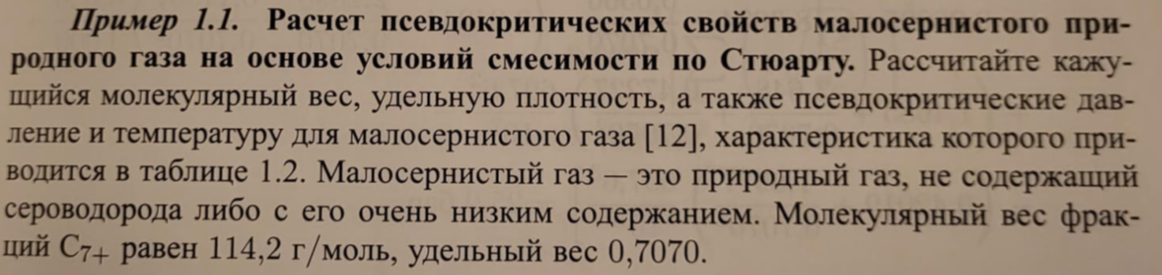

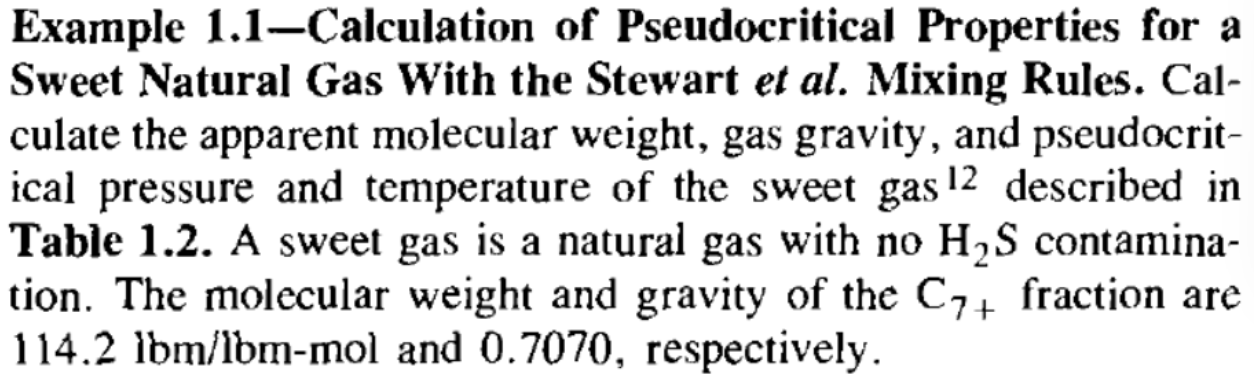

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Table1.2.csv')

In [ ]:
print(df.head(10))

    Component   Mole fraction   Molecular Weight  Critical temperature  \
0    Nitrogen          0.0138             28.013               126.200   
1      Methan          0.9302             16.043               190.560   
2      Ethane          0.0329             30.070               305.330   
3     Propane          0.0136             44.097               369.850   
4   Iso-Butan          0.0023             58.123                407.85   
5     N-Butan          0.0037             58.123                425.16   
6  Isopentane          0.0012             72.150                460.43   
7   N-pentane          0.0010             72.150                469.71   
8      Hexane          0.0008             86.177                507.37   
9   Heptane +          0.0005            114.231                     -   

   Critical pressure  
0             34.000  
1             45.900  
2             48.700  
3             42.500  
4               36.4  
5               38.0  
6               33.8  
7

In [ ]:
Tabla=pd.DataFrame(df)

In [ ]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature     object
 Critical pressure        object
dtype: object


In [ ]:
MC7plus= 114.2
GC7plus= 0.7070

In [ ]:
#Темпервтура кипения
Tbplus=5/9 * ((4.5579*(MC7plus**0.15178)*(GC7plus**0.15427))**3)
print("Темпервтура кипения : ", Tbplus, "K")

Темпервтура кипения :  387.4979017731816 K


In [ ]:
#Псевдокритическое давление
Ppplus= 0.06895 * np.exp( 8.3634 -(0.0566/GC7plus) -
                        ((0.24244 + (2.2898/GC7plus) + (0.11857/GC7plus**2)) * (9*Tbplus/5000)) +
                        ((1.4685 + (3.648/GC7plus)+ (0.47227/GC7plus**2))* ((9*Tbplus/5)**2/(10**7))-
                        ((0.42019 + 1.6977/GC7plus**2)* ((9*Tbplus/5)**3/(10**10)))))

print(Ppplus, "bar или", Ppplus*14.5, "psia")

25.90198225730165 bar или 375.57874273087396 psia


In [ ]:
#Псевдокритическая температура
Tpcplus = 5/9 * ((341.7 + 811 * GC7plus) + ((0.4244 + 0.1174*GC7plus)*(9*Tbplus/5)) +
                 ((0.4669 - 3.2623*GC7plus)*(10**5/(9*Tbplus/5))))
print(Tpcplus, "K")


558.4734462140145 K


In [ ]:
print(Tabla.columns.values)

['Component' ' Mole fraction' ' Molecular Weight' ' Critical temperature'
 ' Critical pressure']


In [ ]:
#добавляем новые данные в таблицу
Tabla.at[9, ' Critical temperature'] = Tpcplus
Tabla.at[9, ' Critical pressure'] = Ppplus

In [ ]:
print(Tabla)

    Component   Mole fraction   Molecular Weight  Critical temperature  \
0    Nitrogen          0.0138             28.013               126.200   
1      Methan          0.9302             16.043               190.560   
2      Ethane          0.0329             30.070               305.330   
3     Propane          0.0136             44.097               369.850   
4   Iso-Butan          0.0023             58.123                407.85   
5     N-Butan          0.0037             58.123                425.16   
6  Isopentane          0.0012             72.150                460.43   
7   N-pentane          0.0010             72.150                469.71   
8      Hexane          0.0008             86.177                507.37   
9   Heptane +          0.0005            114.231            558.473446   

   Critical pressure  
0             34.000  
1             45.900  
2             48.700  
3             42.500  
4               36.4  
5               38.0  
6               33.8  
7

In [ ]:
Tabla[' Critical temperature'] = pd.to_numeric(df[' Critical temperature'], errors='coerce')
Tabla[' Critical pressure'] = pd.to_numeric(df[' Critical pressure'], errors='coerce')

In [ ]:
print(Tabla.dtypes)

Component                 object
 Mole fraction           float64
 Molecular Weight        float64
 Critical temperature    float64
 Critical pressure       float64
dtype: object


In [ ]:
# Obtener el valor de la celda específica usando .loc
#Tabla= pd.DataFrame(df)
#print(Tabla)


In [ ]:
valor_iloc = Tabla.iloc[3, 2]
print(valor_iloc)

44.097


In [ ]:
#Коэффициенты Fj, Ej и  Ek
#def SuttonCorrection(Mf, Tc, Pc):
#    import numpy as np
    #Mf Mole fraction #Tc Critical Temperature #Pc Critical Pressure
#    Fj= 0.0414*(Mf*Tc/Pc) + 0.0827*(Mf**2*Tc/Pc)
#    return(Fj)



In [ ]:
#Коэффициенты Fj, Ej и  Ek
Mfplus=Tabla.iloc[9, 1] #[Row, Column]
Tcplus= Tabla.iloc[9, 3]
Pcplus=Tabla.iloc[9, 4]
#print(Mfplus, Tcplus, Pcplus)


In [ ]:
Fj= 0.0414*(Mf*Tc/Pc) + 0.0827*(Mf**2*Tc/Pc)
Ej =0.6081*Fj + 1.1325*Fj**2 - 14.004*Fj*Mfplus + 64.434*Fj*Mfplus**2
Ek= 0.47265*(Tcplus/np.sqrt(Pcplus))*(0.3129*Mfplus - 4.8156*Mfplus**2 + 27.3751*Mfplus**3)

In [ ]:
print("Fj :", Fj, "Ej: ", Ej, "Ek :",  Ek)

Fj : 0.00044675911905809815 Ej:  0.0002687792494439518 Ek : 0.008052040698587972


In [179]:
#Parameters J and K
Tabla['Part1']= (Tabla[' Mole fraction'] * Tabla[' Critical temperature']/Tabla[' Critical pressure'])
Tabla['Part2'] = (Tabla[' Mole fraction']* np.sqrt(Tabla[' Critical temperature']/Tabla[' Critical pressure']))
Tabla['Part3']= (Tabla[' Mole fraction']* Tabla[' Critical temperature']/ np.sqrt(Tabla[' Critical pressure']))

In [180]:
print(Tabla)

    Component   Mole fraction   Molecular Weight   Critical temperature  \
0    Nitrogen          0.0138             28.013             126.200000   
1      Methan          0.9302             16.043             190.560000   
2      Ethane          0.0329             30.070             305.330000   
3     Propane          0.0136             44.097             369.850000   
4   Iso-Butan          0.0023             58.123             407.850000   
5     N-Butan          0.0037             58.123             425.160000   
6  Isopentane          0.0012             72.150             460.430000   
7   N-pentane          0.0010             72.150             469.710000   
8      Hexane          0.0008             86.177             507.370000   
9   Heptane +          0.0005            114.231             558.473446   

    Critical pressure     Part1     Part2      Part3  
0           34.000000  0.051222  0.026587   0.298675  
1           45.900000  3.861850  1.895334  26.163855  
2        